#ikinci El Araç Fiyat Tahmini: Lineer Regresyon Modeli

In [539]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [540]:
# Veri yükleme ve ön işleme
df = pd.read_csv("cleaned_data.csv")

In [541]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   model        1419 non-null   object
 1   model_detay  1419 non-null   object
 2   model_yili   1419 non-null   int64 
 3   fiyat        1419 non-null   int64 
 4   sehir        1419 non-null   object
 5   ilce         1419 non-null   object
 6   ilan_turu    1419 non-null   object
 7   tip          1419 non-null   object
 8   marka        1419 non-null   object
 9   motor_hacmi  1419 non-null   object
 10  motor_tipi   1419 non-null   object
 11  donanim      1419 non-null   object
dtypes: int64(2), object(10)
memory usage: 133.2+ KB
None


In [542]:
df["model"]        = df["model"].astype("category")
df["model_detay"]  = df["model_detay"].astype("category")
df["sehir"]        = df["sehir"].astype("category")
df["ilce"]         = df["ilce"].astype("category")
df["ilan_turu"]    = df["ilan_turu"].astype("category")
df["tip"]          = df["tip"].astype("category")
df["marka"]        = df["marka"].astype("category")
df["motor_hacmi"]  = df["motor_hacmi"].astype("category")
df["motor_tipi"]   = df["motor_tipi"].astype("category")
df["donanim"]      = df["donanim"].astype("category")

In [543]:
print((df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   model        1419 non-null   category
 1   model_detay  1419 non-null   category
 2   model_yili   1419 non-null   int64   
 3   fiyat        1419 non-null   int64   
 4   sehir        1419 non-null   category
 5   ilce         1419 non-null   category
 6   ilan_turu    1419 non-null   category
 7   tip          1419 non-null   category
 8   marka        1419 non-null   category
 9   motor_hacmi  1419 non-null   category
 10  motor_tipi   1419 non-null   category
 11  donanim      1419 non-null   category
dtypes: category(10), int64(2)
memory usage: 132.8 KB
None


In [544]:
categorical_features = [
    'model',
    'model_detay',
    'sehir',
    'ilce',
    'ilan_turu',
    'tip',
    'marka',
    'motor_hacmi',
    'motor_tipi',
    'donanim'
]
numerical_features = [
    'model_yili',
]

In [545]:
full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [546]:
X = df.drop('fiyat', axis=1) 
y = df['fiyat']    

In [547]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [548]:
model = Pipeline([
    ('preparation', full_pipeline),
    ('linear_regression', LinearRegression())
])

In [549]:
model.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['model_yili']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['model', 'model_detay',
                                                   'sehir', 'ilce', 'ilan_turu',
                                                   'tip', 'marka',
                                                   'motor_hacmi', 'motor_tipi',
                                                   'donanim'])])),
                ('linear_regression', LinearRegression())])

In [550]:
y_pred = model.predict(X_test)
mse = mean_squared_error (y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")


MSE: 20964140158.92
RMSE: 144789.99
R^2: 0.88


In [551]:
feature_importances = model.named_steps['linear_regression'].coef_
print(len(feature_importances))        # Özellik sayısını yazdırır
print(feature_importances)             # Katsayıları yazdırır

2042
[287454.13664868 102313.55252827 -79529.37778621 ... -41301.10773115
  69731.43721911  11899.53768587]


In [552]:
for i in range(len(categorical_features)):
    for j in range(len(model.named_steps['preparation'].transformers_[1][1].categories_[i])):
        print(
            model.named_steps['preparation'].transformers_[1][1].categories_[i][j],
            feature_importances[j]
        )

Alfa Romeo Tonale 1.5 VGT TI 287454.13664867874
Audi A3 102313.55252827411
Audi A3 Sedan 1.4 TFSI Attraction -79529.37778620639
Audi A3 Sedan 1.6 TDI Ambiente 13553.229734335106
Audi A3 Sedan 1.6 TDI Attraction 65419.00905496119
Audi A3 Sedan 35 TFSI Advanced -73688.71734901791
Audi A3 Sedan 35 TFSI S-Line 62145.74158100135
Audi A3 Sportback 1.0 TFSI Design Line 113778.5055280029
Audi A3 Sportback 1.6 TDI Attraction 60618.52618460582
Audi A4 Avant 2.5 TDI -107501.28118519027
Audi A4 Sedan 1.8 TFSI -7656.071277797185
Audi A4 Sedan 2.0 TDI -32812.2059892008
Audi A5 Sportback 2.0 TDI -60068.00197281608
Audi A6 Sedan 2.0 68363.15119927184
Audi A6 Sedan 2.0 TDI -88224.95592811648
Audi Q5 2.0 TDI Quattro 173327.18755872306
Audi Q7 3.0 TDI Quattro 57647.28629764574
BMW 1 Serisi 116d Joy Plus 15256.4959207206
BMW 1 Serisi 116d M Sport -85331.38701329866
BMW 1 Serisi 116i Sport Line 47693.959917345295
BMW 2 Serisi 216d Gran Coupe First Edition Sport Line -79342.18770542867
BMW 3 Serisi 316i M S

In [553]:
new_car = pd.DataFrame({
    'model': ['Mercedes-Benz A 180'],
    'model_detay': ['2020 Model 50.000 km'],
    'model_yili': [2020],
    'sehir': ['İzmir'],
    'ilce': ['Bornova'],
    'ilan_turu': ['emlak'],
    'tip': ['Otomobil'],
    'marka': ['Mercedes-Benz'],
    'motor_hacmi': ['1.6'],
    'motor_tipi': ['Benzin'],
    'donanim': ['AMG']
})


In [554]:
predicted_price = model.predict(new_car)
print(f"Tahmini fiyat: {predicted_price[0]:.0f} TL")

Tahmini fiyat: 1213999 TL


In [555]:
benzer_araclar = df[
    (df["marka"].str.lower() == "mercedes") &
    (df["model"].str.contains("A 180", case=False, na=False))
]
print(benzer_araclar[["model_yili", "model", "fiyat"]].sort_values(by="fiyat", ascending=False))

      model_yili                                           model    fiyat
119         2020                   Mercedes - Benz A 180 d Style  1950000
531         2020                   Mercedes - Benz A 180 d Style  1950000
1280        2020                   Mercedes - Benz A 180 d Style  1685000
818         2015    Mercedes - Benz A 180 CDI BlueEFFICIENCY AMG  1299000
854         2015    Mercedes - Benz A 180 CDI BlueEFFICIENCY AMG  1299000
1032        2015    Mercedes - Benz A 180 CDI BlueEFFICIENCY AMG  1299000
1161        2016                   Mercedes - Benz A 180 d Style  1265000
284         2014      Mercedes - Benz A 180 BlueEFFICIENCY Style  1240000
696         2014      Mercedes - Benz A 180 BlueEFFICIENCY Style  1240000
1086        2013  Mercedes - Benz A 180 CDI BlueEFFICIENCY Style   879000


In [556]:
print("Benzer araçların ortalama fiyatı:", int(benzer_araclar["fiyat"].mean()), "TL")

Benzer araçların ortalama fiyatı: 1410600 TL


In [557]:
print("Tahmini fiyat:", int(predicted_price[0]), "TL")
print("Gerçek ortalama fiyat:", int(benzer_araclar["fiyat"].mean()), "TL")
print("Fark:", int(predicted_price[0] - benzer_araclar["fiyat"].mean()), "TL")

Tahmini fiyat: 1213999 TL
Gerçek ortalama fiyat: 1410600 TL
Fark: -196600 TL


In [558]:
def tolerance_r2(y_true, y_pred, tolerance):
    """ Belirli bir tolerans değeri için R² skorunu hesaplar.
    Parameters:
    y_true : np.ndarray
        Gerçek fiyat değerleri
    y_pred : np.ndarray
        Tahmin edilen fiyat değerleri
    tolerance : float
        Tolerans değeri (TL cinsinden)
    Returns:
    float
        Toleranslı R² skoru (0-1 arasında)
    
    Examples:
    >>> tolerance_r2(y_test, y_pred, 10000)
    0.88
    """
    residuals = y_pred - y_true
    residuals[np.abs(residuals) <= tolerance] = 0
    ssr = np.sum(residuals ** 2)
    sst = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ssr / sst)

In [559]:
def tolerance_percentage_r2(y_true, y_pred, tolerance):
    """Yüzdelik tolerans değeri için R² skorunu hesaplar.

    Parameters:
    y_true : np.ndarray
        Gerçek fiyat değerleri
    y_pred : np.ndarray
        Tahmin edilen fiyat değerleri
    tolerance : float
        Tolerans değeri (0-1 arasında yüzdelik)

    Returns:
    float
        Yüzdelik toleranslı R² skoru (0-1 arasında)
    
    Examples:
    >>> tolerance_percentage_r2(y_test, y_pred, 0.50)
    0.95
    """
    residuals = y_pred - y_true
    residuals[(np.abs(residuals) / y_true) <= tolerance] = 0
    ssr = np.sum(residuals ** 2)
    sst = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ssr / sst)

In [560]:
print("R² Skoru:", r2_score(y_test, y_pred))
print("Tolerance R² (±10.000 TL):", tolerance_r2(y_test, y_pred, 10000))
print("Tolerance % R² (±%50 fark):", tolerance_percentage_r2(y_test, y_pred, 0.50))

R² Skoru: 0.8791257218208613
Tolerance R² (±10.000 TL): 0.8791325350233662
Tolerance % R² (±%50 fark): 0.9510791691926532


In [561]:
results_df = pd.DataFrame({
    "Gerçek Fiyat": y_test.values,
    "Tahmin Fiyat": y_pred,
    "Fark": y_pred - y_test.values
})
display(results_df.head(10))  # İlk 10 satırı göster

,Gerçek Fiyat,Tahmin Fiyat,Fark
0,1197500,1.197482e+06,-17.675071
1,295000,2.950220e+05,22.047054
2,1215000,9.865054e+05,-228494.648026
3,720000,7.199999e+05,-0.140289
4,609900,6.099038e+05,3.798598
5,1278000,1.221626e+06,-56374.001701
6,1265000,1.264991e+06,-8.587370
7,1480000,1.479993e+06,-7.438703
8,1270000,1.269974e+06,-26.308592
9,665000,6.703453e+05,5345.294980


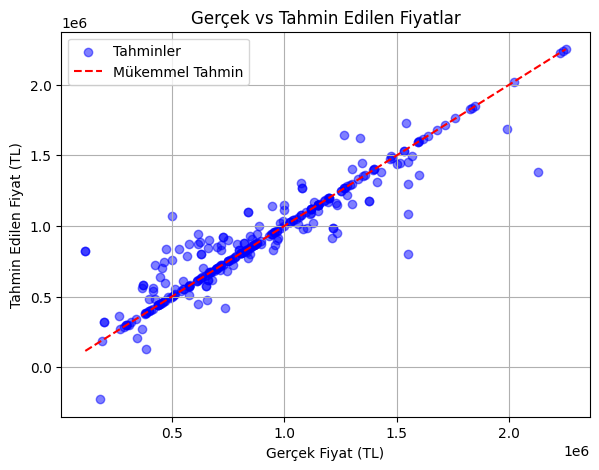

In [562]:
"""## 4. Model Performans Görselleştirmesi"""

# 1. Gerçek vs Tahmin Karşılaştırması
plt.figure(figsize=(15, 5))

# İlk grafik: Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Tahminler')
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', 
         label='Mükemmel Tahmin')
plt.xlabel("Gerçek Fiyat (TL)")
plt.ylabel("Tahmin Edilen Fiyat (TL)")
plt.title("Gerçek vs Tahmin Edilen Fiyatlar")
plt.legend()
plt.grid(True)

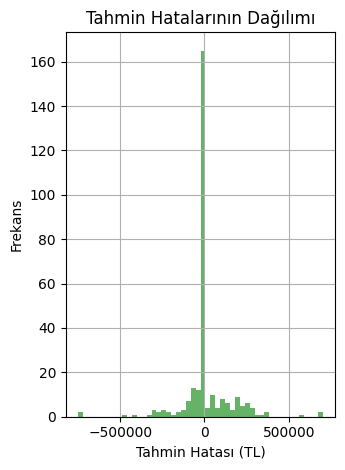

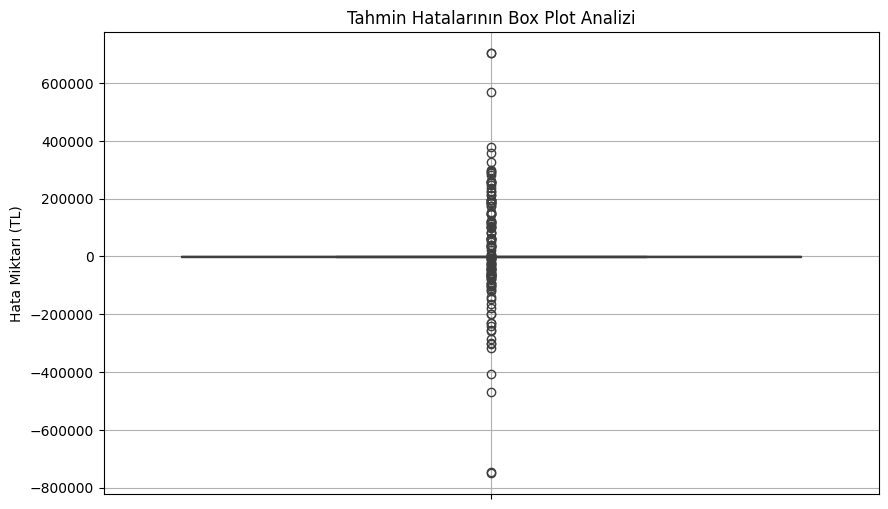

In [563]:
# İkinci grafik: Tahmin hatalarının dağılımı
plt.subplot(1, 2, 2)
plt.hist(y_pred - y_test, bins=50, color='green', alpha=0.6)
plt.xlabel("Tahmin Hatası (TL)")
plt.ylabel("Frekans")
plt.title("Tahmin Hatalarının Dağılımı")
plt.grid(True)

plt.tight_layout()
plt.show()

# 2. Hata Analizi Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=y_pred - y_test)
plt.title("Tahmin Hatalarının Box Plot Analizi")
plt.ylabel("Hata Miktarı (TL)")
plt.grid(True)
plt.show()

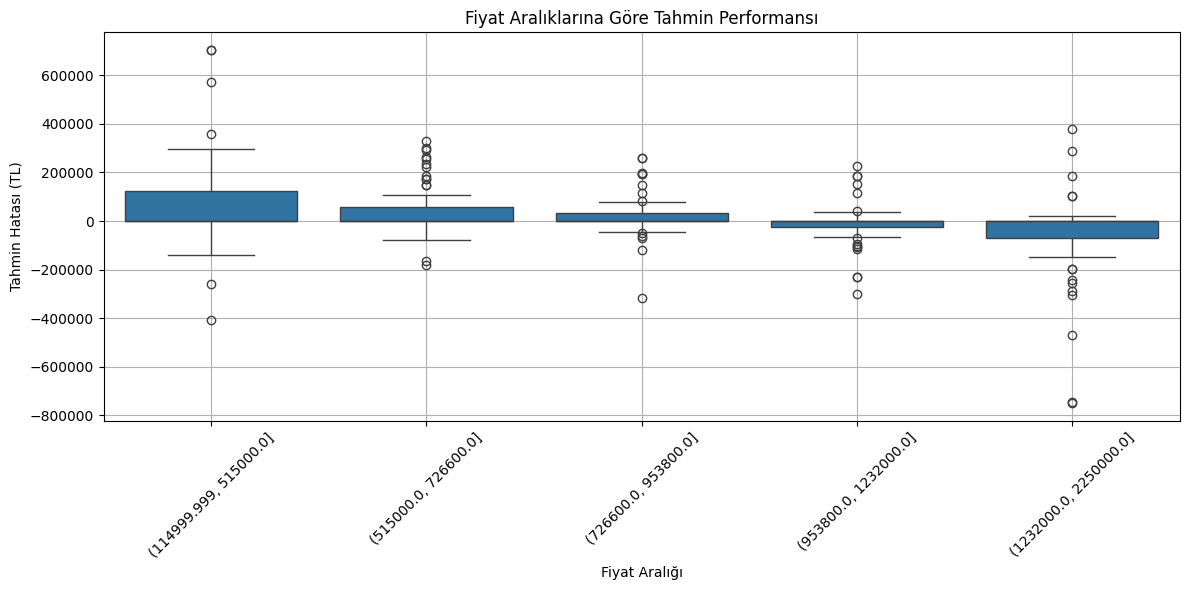

In [564]:
# 3. Fiyat Aralıklarına Göre Performans
plt.figure(figsize=(12, 6))
results_df['Fiyat_Araligi'] = pd.qcut(results_df['Gerçek Fiyat'], q=5)
sns.boxplot(x='Fiyat_Araligi', y='Fark', data=results_df)
plt.xticks(rotation=45)
plt.xlabel("Fiyat Aralığı")
plt.ylabel("Tahmin Hatası (TL)")
plt.title("Fiyat Aralıklarına Göre Tahmin Performansı")
plt.grid(True)
plt.tight_layout()
plt.show()

In [565]:
# 4. Hata Özeti Tablosu
hata_ozeti = pd.DataFrame({
    'Metrik': ['Ortalama Hata', 'Medyan Hata', 'Std. Sapma', 'Min Hata', 'Max Hata'],
    'Değer': [
        results_df['Fark'].mean(),
        results_df['Fark'].median(),
        results_df['Fark'].std(),
        results_df['Fark'].min(),
        results_df['Fark'].max()
    ]
})
display(hata_ozeti)

,Metrik,Değer
0,Ortalama Hata,13709.601257
1,Medyan Hata,-0.804456
2,Std. Sapma,144393.909430
3,Min Hata,-749767.742334
4,Max Hata,703801.988395
